# 1. Iris(LDA/ Support Vector Machine (SVM)/ Logistic Regression)

In [1]:
pip install ucimlrepo

In [2]:
import time
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from itertools import combinations
from scipy.stats import f, studentized_range
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox_llf

In [3]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# --- SVM ---
svm = SVC(kernel='rbf', random_state=42)

start = time.time()
svm.fit(X_train_scaled, y_train)
svm_train_time = time.time() - start

start = time.time()
y_pred_svm = svm.predict(X_test_scaled)
svm_predict_time = time.time() - start

acc_svm = accuracy_score(y_test, y_pred_svm)

In [6]:
print("\nSVM Accuracy:", acc_svm)
print("SVM Training Time: {:.6f} seconds".format(svm_train_time))
print("SVM Prediction Time: {:.6f} seconds".format(svm_predict_time))


SVM Accuracy: 1.0
SVM Training Time: 0.006293 seconds
SVM Prediction Time: 0.000768 seconds


In [7]:
# --- Logistic Regression ---
lr = LogisticRegression(max_iter=200, random_state=42)

start = time.time()
lr.fit(X_train_scaled, y_train)
lr_train_time = time.time() - start

start = time.time()
y_pred_lr = lr.predict(X_test_scaled)
lr_predict_time = time.time() - start

acc_lr = accuracy_score(y_test, y_pred_lr)

In [8]:
print("\nLogistic Regression Accuracy:", acc_lr)
print("Logistic Regression Training Time: {:.6f} seconds".format(lr_train_time))
print("Logistic Regression Prediction Time: {:.6f} seconds".format(lr_predict_time))


Logistic Regression Accuracy: 1.0
Logistic Regression Training Time: 0.020065 seconds
Logistic Regression Prediction Time: 0.000329 seconds


In [9]:
# --- LDA ---
lda = LinearDiscriminantAnalysis()
start = time.time()
lda.fit(X_train_scaled, y_train)
lda_train_time = time.time() - start

start = time.time()
y_pred_lda = lda.predict(X_test_scaled)
lda_predict_time = time.time() - start

acc_lda = accuracy_score(y_test, y_pred_lda)

In [10]:
print("\nLDA Accuracy:", acc_lda)
print("LDA Training Time: {:.6f} seconds".format(lda_train_time))
print("LDA Prediction Time: {:.6f} seconds".format(lda_predict_time))


LDA Accuracy: 1.0
LDA Training Time: 0.021149 seconds
LDA Prediction Time: 0.000412 seconds


In [11]:
# Evaluate models using 5-fold cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True)
scores_dt = cross_val_score(lr, scaler.fit_transform(X), y, cv=cv)
scores_svm = cross_val_score(svm, scaler.fit_transform(X), y, cv=cv)
scores_lr = cross_val_score(lda, scaler.fit_transform(X), y, cv=cv)

print("\nCross-Validation Mean Accuracy (5 folds):")
print("Decision Tree CV Accuracy:", scores_dt.mean())
print("SVM CV Accuracy:", scores_svm.mean())
print("LDA CV Accuracy:", scores_lr.mean())



Cross-Validation Mean Accuracy (5 folds):
Decision Tree CV Accuracy: 0.9533333333333334
SVM CV Accuracy: 0.9666666666666666
LDA CV Accuracy: 0.9800000000000001


#2. Wine Dataset(Decision Tree/LDA/k-Nearest Neighbors (k-NN))

In [12]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# --- Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)

start = time.time()
dt.fit(X_train, y_train)
dt_train_time = time.time() - start

start = time.time()
y_pred_dt = dt.predict(X_test)
dt_predict_time = time.time() - start

acc_dt = accuracy_score(y_test, y_pred_dt)

In [15]:
# --- knn ---
knn = KNeighborsClassifier()
start = time.time()
knn.fit(X_train_scaled, y_train)
knn_train_time = time.time() - start

start = time.time()
y_pred_knn = knn.predict(X_test_scaled)
knn_predict_time = time.time() - start

acc_knn = accuracy_score(y_test, y_pred_knn)

In [16]:
# --- Logistic Regression ---
lr = LogisticRegression(max_iter=200, random_state=42)

start = time.time()
lr.fit(X_train_scaled, y_train)
lr_train_time = time.time() - start

start = time.time()
y_pred_lr = lr.predict(X_test_scaled)
lr_predict_time = time.time() - start

acc_lr = accuracy_score(y_test, y_pred_lr)

In [17]:
print("Wine Dataset Results:")

print("Decision Tree:")
print("  Accuracy:", acc_dt)
print("  Training Time: {:.6f} seconds".format(dt_train_time))
print("  Prediction Time: {:.6f} seconds".format(dt_predict_time))

print("\nk-Nearest Neighbors:")
print("  Accuracy:", acc_knn)
print("  Training Time: {:.6f} seconds".format(knn_train_time))
print("  Prediction Time: {:.6f} seconds".format(knn_predict_time))

print("\nLogistic Regression:")
print("  Accuracy:", acc_lr)
print("  Training Time: {:.6f} seconds".format(lr_train_time))
print("  Prediction Time: {:.6f} seconds".format(lr_predict_time))

Wine Dataset Results:
Decision Tree:
  Accuracy: 0.9629629629629629
  Training Time: 0.002314 seconds
  Prediction Time: 0.000509 seconds

k-Nearest Neighbors:
  Accuracy: 0.9629629629629629
  Training Time: 0.001814 seconds
  Prediction Time: 0.005310 seconds

Logistic Regression:
  Accuracy: 0.9814814814814815
  Training Time: 0.005547 seconds
  Prediction Time: 0.000362 seconds


In [18]:
scores_dt = cross_val_score(dt, scaler.fit_transform(X), y, cv=cv)
scores_svm = cross_val_score(knn, scaler.fit_transform(X), y, cv=cv)
scores_lr = cross_val_score(lr, scaler.fit_transform(X), y, cv=cv)

print("\nCross-Validation Mean Accuracy (5 folds):")
print("Decision Tree CV Accuracy:", scores_dt.mean())
print("knn CV Accuracy:", scores_svm.mean())
print("logistic Regression CV Accuracy:", scores_lr.mean())


Cross-Validation Mean Accuracy (5 folds):
Decision Tree CV Accuracy: 0.9438095238095237
knn CV Accuracy: 0.9719047619047618
logistic Regression CV Accuracy: 0.9776190476190475


# Wine Quality Dataset(Support Vector Machine (SVM)/Logistic Regressions/kNN)

In [19]:
wine_quality = fetch_ucirepo(id=186)

X = wine_quality.data.features
y = wine_quality.data.targets

In [20]:
y.value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# --- SVM ---
svm = SVC(kernel='rbf', random_state=42)

start = time.time()
svm.fit(X_train_scaled, y_train.values.ravel())
svm_train_time = time.time() - start

start = time.time()
y_pred_svm = svm.predict(X_test_scaled)
svm_predict_time = time.time() - start

acc_svm = accuracy_score(y_test, y_pred_svm)

In [24]:
# --- Logistic Regression ---
lr = LogisticRegression(max_iter=200, random_state=42)

start = time.time()
lr.fit(X_train_scaled, y_train.values.ravel())
lr_train_time = time.time() - start

start = time.time()
y_pred_lr = lr.predict(X_test_scaled)
lr_predict_time = time.time() - start

acc_lr = accuracy_score(y_test, y_pred_lr)

In [25]:
# --- knn ---
knn = KNeighborsClassifier()
start = time.time()
knn.fit(X_train_scaled, y_train.values.ravel())
knn_train_time = time.time() - start

start = time.time()
y_pred_knn = knn.predict(X_test_scaled)
knn_predict_time = time.time() - start

acc_knn = accuracy_score(y_test, y_pred_knn)

In [26]:
print("Wine Quality Dataset Results:")

print("\nSVM:")
print("  Accuracy: {:.4f}".format(acc_svm))
print("  Training Time: {:.6f} seconds".format(svm_train_time))
print("  Prediction Time: {:.6f} seconds".format(svm_predict_time))

print("\nLogistic Regression:")
print("  Accuracy: {:.4f}".format(acc_lr))
print("  Training Time: {:.6f} seconds".format(lr_train_time))
print("  Prediction Time: {:.6f} seconds".format(lr_predict_time))

print("\nkNN:")
print("  Accuracy: {:.4f}".format(acc_knn))
print("  Training Time: {:.6f} seconds".format(knn_train_time))
print("  Prediction Time: {:.6f} seconds".format(knn_predict_time))

Wine Quality Dataset Results:

SVM:
  Accuracy: 0.5585
  Training Time: 0.785880 seconds
  Prediction Time: 0.382319 seconds

Logistic Regression:
  Accuracy: 0.5354
  Training Time: 0.107893 seconds
  Prediction Time: 0.000574 seconds

kNN:
  Accuracy: 0.5456
  Training Time: 0.008386 seconds
  Prediction Time: 0.187470 seconds


In [27]:
scores_dt = cross_val_score(svm, scaler.fit_transform(X), y.values.ravel(), cv=cv)
scores_svm = cross_val_score(lr, scaler.fit_transform(X), y.values.ravel(), cv=cv)
scores_lda = cross_val_score(knn, scaler.fit_transform(X), y.values.ravel(), cv=cv)

print("\nCross-Validation Mean Accuracy (5 folds):")
print("SVM CV Accuracy:", scores_dt.mean())
print("Logistic Regression CV Accuracy:", scores_svm.mean())
print("kNN CV Accuracy:", scores_lda.mean())


Cross-Validation Mean Accuracy (5 folds):
SVM CV Accuracy: 0.572419257416948
Logistic Regression CV Accuracy: 0.5442513175815716
kNN CV Accuracy: 0.5659506128974952


# Adult Census Income Dataset(SVM/LDA/k-Nearest Neighbors (k-NN))

In [28]:
adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets

In [29]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [30]:
X_clean, y_clean = X.dropna(), y.loc[X.dropna().index]

In [31]:
X_clean

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [32]:
print(y_clean["income"].unique())

['<=50K' '>50K' '<=50K.' '>50K.']


In [33]:
binary_income = y_clean["income"].str.replace(r'\.', '', regex=True)

In [34]:
binary_income = (binary_income == '>50K').astype(int)

In [35]:
binary_income

,income
0,0
1,0
2,0
3,0
4,0
...,...
48836,0
48837,0
48839,0
48840,0


In [36]:
categorical_cols = ["workclass", "education", "marital-status", "occupation",
                    "relationship", "race", "sex", "native-country"]

# One-hot encoding
df = pd.get_dummies(X_clean, columns=categorical_cols, drop_first=True)

In [37]:
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,245211,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48837,39,215419,13,0,0,36,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48839,38,374983,13,0,0,50,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,44,83891,13,5455,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [38]:
X_train, X_test, y_train, y_test = train_test_split(df, binary_income,
                                                    test_size=0.3,
                                                    random_state=42)

In [39]:
scaler = StandardScaler()

In [40]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# --- SVM ---
svm = SVC(kernel='rbf', random_state=42)

start = time.time()
svm.fit(X_train_scaled, y_train.values.ravel())
svm_train_time = time.time() - start

start = time.time()
y_pred_svm = svm.predict(X_test_scaled)
svm_predict_time = time.time() - start

acc_svm = accuracy_score(y_test, y_pred_svm)

In [42]:
# --- LDA ---
lda = LinearDiscriminantAnalysis()
start = time.time()
lda.fit(X_train_scaled, y_train.values.ravel())
lda_train_time = time.time() - start

start = time.time()
y_pred_lda = lda.predict(X_test_scaled)
lda_predict_time = time.time() - start

acc_lda = accuracy_score(y_test, y_pred_lda)

In [43]:
# --- knn ---
knn = KNeighborsClassifier()
start = time.time()
knn.fit(X_train_scaled, y_train)
knn_train_time = time.time() - start

start = time.time()
y_pred_knn = knn.predict(X_test_scaled)
knn_predict_time = time.time() - start

acc_knn = accuracy_score(y_test, y_pred_knn)

In [44]:
print("Adult Dataset Results:")

print("SVM:")
print("  Accuracy: {:.4f}".format(acc_svm))
print("  Training Time: {:.6f} seconds".format(svm_train_time))
print("  Prediction Time: {:.6f} seconds".format(svm_predict_time))

print("\nLDA:")
print("  Accuracy: {:.4f}".format(acc_lda))
print("  Training Time: {:.6f} seconds".format(lda_train_time))
print("  Prediction Time: {:.6f} seconds".format(lda_predict_time))

print("\nknn:")
print("  Accuracy: {:.4f}".format(acc_knn))
print("  Training Time: {:.6f} seconds".format(knn_train_time))
print("  Prediction Time: {:.6f} seconds".format(knn_predict_time))

Adult Dataset Results:
SVM:
  Accuracy: 0.8474
  Training Time: 107.179754 seconds
  Prediction Time: 12.183115 seconds

LDA:
  Accuracy: 0.8378
  Training Time: 0.200607 seconds
  Prediction Time: 0.040539 seconds

knn:
  Accuracy: 0.8194
  Training Time: 0.037381 seconds
  Prediction Time: 1.444059 seconds


In [45]:
scores_1 = cross_val_score(svm, scaler.fit_transform(df), binary_income, cv=cv)
scores_2 = cross_val_score(lda, scaler.fit_transform(df), binary_income, cv=cv)
scores_3 = cross_val_score(knn, scaler.fit_transform(df), binary_income, cv=cv)

print("\nCross-Validation Mean Accuracy (5 folds):")
print("SVM CV Accuracy:", scores_1.mean())
print("LDA CV Accuracy:", scores_2.mean())
print("k-NN CV Accuracy:", scores_3.mean())


Cross-Validation Mean Accuracy (5 folds):
Decision Tree CV Accuracy: 0.8497301581527423
Logistic Regression CV Accuracy: 0.8383275184890003
k-NN CV Accuracy: 0.8223893421344173


# Bank Marketing Dataset(SVM/LDA/Decision Tree)

In [46]:
bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features
y = bank_marketing.data.targets

In [47]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [48]:
X["contact"].value_counts()

,count
contact,
cellular,29285
telephone,2906


In [49]:
X["poutcome"].value_counts()

,count
poutcome,
failure,4901
other,1840
success,1511


In [50]:
X = X.drop(columns=["contact", "poutcome"])

In [51]:
X

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0
3,47,blue-collar,married,NaN,no,1506,yes,no,5,may,92,1,-1,0
4,33,NaN,single,NaN,no,1,no,no,5,may,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0


In [52]:
X_clean, y_clean = X.dropna(), y.loc[X.dropna().index]

In [53]:
X_clean

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0


In [54]:
y_clean = y_clean["y"].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)

In [55]:
y_clean

,y
0,0
1,0
2,0
5,0
6,0
...,...
45206,1
45207,1
45208,1
45209,0


In [56]:
X_encoded = pd.get_dummies(X_clean, drop_first=True)


In [57]:
X_encoded

,age,balance,day_of_week,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
5,35,231,5,139,1,-1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6,28,447,5,217,1,-1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45207,71,1729,17,456,2,-1,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45208,72,5715,17,1127,5,184,3,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45209,57,668,17,508,4,-1,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_clean,
                                                    test_size=0.3,
                                                    random_state=42)

In [59]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# --- Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)

start = time.time()
dt.fit(X_train_scaled, y_train)
dt_train_time = time.time() - start

start = time.time()
y_pred_dt = dt.predict(X_test_scaled)
dt_predict_time = time.time() - start

acc_dt = accuracy_score(y_test, y_pred_dt)

In [61]:
# --- SVM ---
svm = SVC(kernel='rbf', random_state=42)

start = time.time()
svm.fit(X_train_scaled, y_train.values.ravel())
svm_train_time = time.time() - start

start = time.time()
y_pred_svm = svm.predict(X_test_scaled)
svm_predict_time = time.time() - start

acc_svm = accuracy_score(y_test, y_pred_svm)

In [62]:
# --- LDA ---
lda = LinearDiscriminantAnalysis()
start = time.time()
lda.fit(X_train_scaled, y_train)
lda_train_time = time.time() - start

start = time.time()
y_pred_lda = lda.predict(X_test_scaled)
lda_predict_time = time.time() - start

acc_lda = accuracy_score(y_test, y_pred_lda)

In [63]:
print("Bank Dataset Results:")

print("SVM:")
print("  Accuracy: {:.4f}".format(acc_svm))
print("  Training Time: {:.6f} seconds".format(svm_train_time))
print("  Prediction Time: {:.6f} seconds".format(svm_predict_time))

print("\nLDA:")
print("  Accuracy: {:.4f}".format(acc_lda))
print("  Training Time: {:.6f} seconds".format(lda_train_time))
print("  Prediction Time: {:.6f} seconds".format(lda_predict_time))

print("Decision Tree:")
print("  Accuracy: {:.4f}".format(acc_dt))
print("  Training Time: {:.6f} seconds".format(dt_train_time))
print("  Prediction Time: {:.6f} seconds".format(dt_predict_time))

Bank Dataset Results:
SVM:
  Accuracy: 0.8969
  Training Time: 9.421101 seconds
  Prediction Time: 4.423630 seconds

LDA:
  Accuracy: 0.8915
  Training Time: 0.057462 seconds
  Prediction Time: 0.000970 seconds
Decision Tree:
  Accuracy: 0.8713
  Training Time: 0.253711 seconds
  Prediction Time: 0.002513 seconds


In [64]:
scores_1 = cross_val_score(svm, scaler.fit_transform(X_encoded), y_clean.values.ravel(), cv=cv)
scores_2 = cross_val_score(lda, scaler.fit_transform(X_encoded), y_clean.values.ravel(), cv=cv)
scores_3 = cross_val_score(dt, scaler.fit_transform(X_encoded), y_clean.values.ravel(), cv=cv)

print("\nCross-Validation Mean Accuracy (5 folds):")
print("SVM CV Accuracy:", scores_1.mean())
print("LDA CV Accuracy:", scores_2.mean())
print("DT CV Accuracy:", scores_3.mean())


Cross-Validation Mean Accuracy (5 folds):
SVM CV Accuracy: 0.8965110780784041
LDA CV Accuracy: 0.8925520212202877
DT CV Accuracy: 0.8687056235043455


# Breast Cancer Wisconsin(Decision Tree/knn/LDA)

In [65]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

In [66]:
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [67]:
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [68]:
y = y["Diagnosis"].apply(lambda x: 1 if x.strip() == 'M' else 0)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [70]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
# --- Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)
start = time.time()
dt.fit(X_train, y_train)
dt_train_time = time.time() - start

start = time.time()
y_pred_dt = dt.predict(X_test)
dt_predict_time = time.time() - start

acc_dt = accuracy_score(y_test, y_pred_dt)

In [72]:
# --- knn ---
knn = KNeighborsClassifier()
start = time.time()
knn.fit(X_train_scaled, y_train)
knn_train_time = time.time() - start

start = time.time()
y_pred_knn = knn.predict(X_test_scaled)
knn_predict_time = time.time() - start

acc_knn = accuracy_score(y_test, y_pred_knn)

In [73]:
# --- LDA ---
lda = LinearDiscriminantAnalysis()
start = time.time()
lda.fit(X_train_scaled, y_train)
lda_train_time = time.time() - start

start = time.time()
y_pred_lda = lda.predict(X_test_scaled)
lda_predict_time = time.time() - start

acc_lda = accuracy_score(y_test, y_pred_lda)

In [74]:
print("Breast Cancer Wisconsin Dataset Results:\n")

print("Decision Tree:")
print("  Accuracy: {:.4f}".format(acc_dt))
print("  Training Time: {:.6f} seconds".format(dt_train_time))
print("  Prediction Time: {:.6f} seconds".format(dt_predict_time))

print("\nk-Nearest Neighbors (k-NN):")
print("  Accuracy: {:.4f}".format(acc_knn))
print("  Training Time: {:.6f} seconds".format(knn_train_time))
print("  Prediction Time: {:.6f} seconds".format(knn_predict_time))

print("\nLinear Discriminant Analysis (LDA):")
print("  Accuracy: {:.4f}".format(acc_lda))
print("  Training Time: {:.6f} seconds".format(lda_train_time))
print("  Prediction Time: {:.6f} seconds".format(lda_predict_time))

Breast Cancer Wisconsin Dataset Results:

Decision Tree:
  Accuracy: 0.9415
  Training Time: 0.008653 seconds
  Prediction Time: 0.001244 seconds

k-Nearest Neighbors (k-NN):
  Accuracy: 0.9591
  Training Time: 0.001380 seconds
  Prediction Time: 0.008906 seconds

Linear Discriminant Analysis (LDA):
  Accuracy: 0.9532
  Training Time: 0.004054 seconds
  Prediction Time: 0.000321 seconds


In [75]:
scores_1 = cross_val_score(dt, scaler.fit_transform(X), y.values.ravel(), cv=cv)
scores_2 = cross_val_score(knn, scaler.fit_transform(X), y.values.ravel(), cv=cv)
scores_3 = cross_val_score(lda, scaler.fit_transform(X), y.values.ravel(), cv=cv)

print("\nCross-Validation Mean Accuracy (5 folds):")
print("Decision Tree CV Accuracy:", scores_1.mean())
print("k-NN CV Accuracy:", scores_2.mean())
print("LDA CV Accuracy:", scores_3.mean())


Cross-Validation Mean Accuracy (5 folds):
Decision Tree CV Accuracy: 0.9455208818506444
k-NN CV Accuracy: 0.9684055270920664
LDA CV Accuracy: 0.9613103555348548


# Mushroom(Support Vector Machine (SVM)/Logistic Regression/k-Nearest Neighbors (k-NN))

In [76]:
mushroom = fetch_ucirepo(id=73)

X = mushroom.data.features
y = mushroom.data.targets

In [77]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [78]:
X["stalk-root"].value_counts()

,count
stalk-root,
b,3776
e,1120
c,556
r,192


In [79]:
X_clean, y_clean = X.dropna(), y.loc[X.dropna().index]

In [80]:
y_clean

,poisonous
0,p
1,e
2,e
3,p
4,e
...,...
7986,e
8001,e
8038,e
8095,p


In [81]:
y_clean = y_clean["poisonous"].apply(lambda x: 1 if x.strip() == 'p' else 0)

In [82]:
y_clean

,poisonous
0,1
1,0
2,0
3,1
4,0
...,...
7986,0
8001,0
8038,0
8095,1


In [83]:
X_encoded = pd.get_dummies(X_clean, drop_first=True)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_clean, test_size=0.3, random_state=42
)

In [85]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
#---SVM---
svm = SVC(kernel='rbf', random_state=42)

start = time.time()
svm.fit(X_train_scaled, y_train)
svm_train_time = time.time() - start

start = time.time()
y_pred_svm = svm.predict(X_test_scaled)
svm_predict_time = time.time() - start

acc_svm = accuracy_score(y_test, y_pred_svm)

In [87]:
#---LR---
lr = LogisticRegression(max_iter=500, random_state=42)

start = time.time()
lr.fit(X_train_scaled, y_train)
lr_train_time = time.time() - start

start = time.time()
y_pred_lr = lr.predict(X_test_scaled)
lr_predict_time = time.time() - start

acc_lr = accuracy_score(y_test, y_pred_lr)

In [88]:
# --- Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)
start = time.time()
dt.fit(X_train, y_train)
dt_train_time = time.time() - start

start = time.time()
y_pred_dt = dt.predict(X_test)
dt_predict_time = time.time() - start

acc_dt = accuracy_score(y_test, y_pred_dt)

In [89]:
print("Mushroom Dataset Results:\n")

print("SVM:")
print("  Accuracy: {:.4f}".format(acc_svm))
print("  Training Time: {:.6f} seconds".format(svm_train_time))
print("  Prediction Time: {:.6f} seconds".format(svm_predict_time))

print("\nLogistic Regression:")
print("  Accuracy: {:.4f}".format(acc_lr))
print("  Training Time: {:.6f} seconds".format(lr_train_time))
print("  Prediction Time: {:.6f} seconds".format(lr_predict_time))

print("\nDT:")
print("  Accuracy: {:.4f}".format(acc_dt))
print("  Training Time: {:.6f} seconds".format(dt_train_time))
print("  Prediction Time: {:.6f} seconds".format(dt_predict_time))

Mushroom Dataset Results:

SVM:
  Accuracy: 1.0000
  Training Time: 0.237007 seconds
  Prediction Time: 0.095866 seconds

Logistic Regression:
  Accuracy: 1.0000
  Training Time: 0.009865 seconds
  Prediction Time: 0.000537 seconds

DT:
  Accuracy: 1.0000
  Training Time: 0.011364 seconds
  Prediction Time: 0.002117 seconds


In [90]:
scores_1 = cross_val_score(svm, scaler.fit_transform(X_encoded), y_clean, cv=10)
scores_2 = cross_val_score(lr, scaler.fit_transform(X_encoded), y_clean, cv=10)
scores_3 = cross_val_score(dt, scaler.fit_transform(X_encoded), y_clean, cv=10)

print("\nCross-Validation Mean Accuracy (5 folds):")
print("SVM CV Accuracy:", scores_1.mean())
print("Logistic Regression CV Accuracy:", scores_2.mean())
print("DT CV Accuracy:", scores_3.mean())


Cross-Validation Mean Accuracy (5 folds):
SVM CV Accuracy: 0.9829787234042554
Logistic Regression CV Accuracy: 0.9829787234042554
k-NN CV Accuracy: 0.9843971631205675


# Car Evaluation(Logistic Regresssion/LDA/kNN)

In [91]:
car_evaluation = fetch_ucirepo(id=19)

X = car_evaluation.data.features
y = car_evaluation.data.targets

In [92]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [93]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [94]:
y.value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


In [95]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [96]:
y["class"] = y["class"].replace({"unacc": 0, "acc": 1, "good": 2, "vgood": 3})

<ipython-input-96-eea155b371a1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y["class"] = y["class"].replace({"unacc": 0, "acc": 1, "good": 2, "vgood": 3})
<ipython-input-96-eea155b371a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["class"] = y["class"].replace({"unacc": 0, "acc": 1, "good": 2, "vgood": 3})


In [97]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
1723,2
1724,3
1725,0
1726,2


In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
# --- Logistic Regression ---
lr = LogisticRegression(max_iter=300, random_state=42)

start = time.time()
lr.fit(X_train_scaled, y_train.values.ravel())
lr_train_time = time.time() - start

start = time.time()
y_pred_lr = lr.predict(X_test_scaled)
lr_predict_time = time.time() - start

acc_lr = accuracy_score(y_test, y_pred_lr)

In [101]:
# --- Linear Discriminant Analysis (LDA) ---
lda = LinearDiscriminantAnalysis()
start = time.time()
lda.fit(X_train_scaled, y_train.values.ravel())
lda_train_time = time.time() - start

start = time.time()
y_pred_lda = lda.predict(X_test_scaled)
lda_predict_time = time.time() - start

acc_lda = accuracy_score(y_test, y_pred_lda)

In [102]:
# --- knn ---
knn = KNeighborsClassifier()
start = time.time()
knn.fit(X_train_scaled, y_train.values.ravel())
knn_train_time = time.time() - start

start = time.time()
y_pred_knn = knn.predict(X_test_scaled)
knn_predict_time = time.time() - start

acc_knn = accuracy_score(y_test, y_pred_knn)

In [103]:
print("Car Evaluation Dataset Results:\n")

print("\nLogistic Regression:")
print("  Accuracy: {:.4f}".format(acc_lr))
print("  Training Time: {:.6f} seconds".format(lr_train_time))
print("  Prediction Time: {:.6f} seconds".format(lr_predict_time))

print("\nLinear Discriminant Analysis (LDA):")
print("  Accuracy: {:.4f}".format(acc_lda))
print("  Training Time: {:.6f} seconds".format(lda_train_time))
print("  Prediction Time: {:.6f} seconds".format(lda_predict_time))

print("\nk-Nearest Neighbors (k-NN):")
print("  Accuracy: {:.4f}".format(acc_knn))
print("  Training Time: {:.6f} seconds".format(knn_train_time))
print("  Prediction Time: {:.6f} seconds".format(knn_predict_time))

Car Evaluation Dataset Results:


Logistic Regression:
  Accuracy: 0.9152
  Training Time: 0.015265 seconds
  Prediction Time: 0.000326 seconds

Linear Discriminant Analysis (LDA):
  Accuracy: 0.8940
  Training Time: 0.003879 seconds
  Prediction Time: 0.000363 seconds

k-Nearest Neighbors (k-NN):
  Accuracy: 0.7938
  Training Time: 0.002822 seconds
  Prediction Time: 0.025328 seconds


In [104]:
scores_1 = cross_val_score(lr, scaler.fit_transform(X_encoded), y.values.ravel(), cv=cv)
scores_2 = cross_val_score(lda, scaler.fit_transform(X_encoded), y.values.ravel(), cv=cv)
scores_3 = cross_val_score(knn, scaler.fit_transform(X_encoded), y.values.ravel(), cv=cv)

print("\nCross-Validation Mean Accuracy (5 folds):")
print("Logistic Regression CV Accuracy:", scores_1.mean())
print("LDA CV Accuracy:", scores_2.mean())
print("kNN CV Accuracy:", scores_3.mean())


Cross-Validation Mean Accuracy (5 folds):
Logistic Regression CV Accuracy: 0.9137706291362988
LDA CV Accuracy: 0.8946720281477758
kNN CV Accuracy: 0.8130736365921086


# Heart Disease(Logisatic/LDA/Decsion Tree)

In [105]:
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

In [106]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [107]:
y.value_counts()

,count
num,
0,164
1,55
2,36
3,35
4,13


In [108]:
y = y["num"].apply(lambda x: 1 if int(x) > 0 else 0)

In [109]:
X_clean, y_clean = X.dropna(), y.loc[X.dropna().index]

In [110]:
X_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


In [111]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.3, random_state=42
)

In [112]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
# --- Logistic Regression ---
lr = LogisticRegression(max_iter=200, random_state=42)

start = time.time()
lr.fit(X_train_scaled, y_train)
lr_train_time = time.time() - start

start = time.time()
y_pred_lr = lr.predict(X_test_scaled)
lr_predict_time = time.time() - start

acc_lr = accuracy_score(y_test, y_pred_lr)

In [114]:
#--- LDA ---
lda = LinearDiscriminantAnalysis()
start = time.time()
lda.fit(X_train_scaled, y_train)
lda_train_time = time.time() - start

start = time.time()
y_pred_lda = lda.predict(X_test_scaled)
lda_predict_time = time.time() - start

acc_lda = accuracy_score(y_test, y_pred_lda)

In [115]:
# --- Decision Tree ---
dt = DecisionTreeClassifier(random_state=42, max_depth=3)

start = time.time()
dt.fit(X_train_scaled, y_train)
dt_train_time = time.time() - start

start = time.time()
y_pred_dt = dt.predict(X_test_scaled)
dt_predict_time = time.time() - start

acc_dt = accuracy_score(y_test, y_pred_dt)

In [116]:
print("Heart Disease (Cleveland) Dataset Results (Binary Classification):\n")

print("Logistic Regression:")
print("  Accuracy: {:.4f}".format(acc_lr))
print("  Training Time: {:.6f} seconds".format(lr_train_time))
print("  Prediction Time: {:.6f} seconds".format(lr_predict_time))

print("\nLinear Discriminant Analysis (LDA):")
print("  Accuracy: {:.4f}".format(acc_lda))
print("  Training Time: {:.6f} seconds".format(lda_train_time))
print("  Prediction Time: {:.6f} seconds".format(lda_predict_time))

print("\nDT:")
print("  Accuracy: {:.4f}".format(acc_dt))
print("  Training Time: {:.6f} seconds".format(dt_train_time))
print("  Prediction Time: {:.6f} seconds".format(dt_predict_time))

Heart Disease (Cleveland) Dataset Results (Binary Classification):

Logistic Regression:
  Accuracy: 0.8889
  Training Time: 0.004970 seconds
  Prediction Time: 0.000473 seconds

Linear Discriminant Analysis (LDA):
  Accuracy: 0.9000
  Training Time: 0.003988 seconds
  Prediction Time: 0.000518 seconds

DT:
  Accuracy: 0.7556
  Training Time: 0.002402 seconds
  Prediction Time: 0.000383 seconds


In [117]:
scores_1 = cross_val_score(lr, scaler.fit_transform(X_clean), y_clean, cv=cv)
scores_2 = cross_val_score(lda, scaler.fit_transform(X_clean), y_clean, cv=cv)
scores_3 = cross_val_score(dt, scaler.fit_transform(X_clean), y_clean, cv=cv)

print("\nCross-Validation Mean Accuracy (5 folds):")
print("Logistic Regression CV Accuracy:", scores_1.mean())
print("lda CV Accuracy:", scores_2.mean())
print("DT CV Accuracy:", scores_3.mean())


Cross-Validation Mean Accuracy (5 folds):
Logistic Regression CV Accuracy: 0.841864406779661
lda CV Accuracy: 0.831638418079096
DT CV Accuracy: 0.7776271186440679


# Spambase(SVM/k-Nearest Neighbors (k-NN)/DT)

In [118]:
spambase = fetch_ucirepo(id=94)
X = spambase.data.features
y = spambase.data.targets

In [119]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [120]:
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [122]:
y_train.shape

(3220, 1)

In [123]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
# --- SVM ---
svm = SVC(kernel='rbf', random_state=42)

start = time.time()
svm.fit(X_train_scaled, y_train.values.ravel())
svm_train_time = time.time() - start

start = time.time()
y_pred_svm = svm.predict(X_test_scaled)
svm_predict_time = time.time() - start

acc_svm = accuracy_score(y_test, y_pred_svm)

In [125]:
# --- Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)
start = time.time()
dt.fit(X_train, y_train)
dt_train_time = time.time() - start

start = time.time()
y_pred_dt = dt.predict(X_test)
dt_predict_time = time.time() - start

acc_dt = accuracy_score(y_test, y_pred_dt)

In [126]:
# --- kNN ---
knn = KNeighborsClassifier()
start = time.time()
knn.fit(X_train_scaled, y_train.values.ravel())
knn_train_time = time.time() - start

start = time.time()
y_pred_knn = knn.predict(X_test_scaled)
knn_predict_time = time.time() - start

acc_knn = accuracy_score(y_test, y_pred_knn)

In [127]:
print("Spambase Dataset Results:\n")

print("SVM:")
print("  Accuracy: {:.4f}".format(acc_svm))
print("  Training Time: {:.6f} seconds".format(svm_train_time))
print("  Prediction Time: {:.6f} seconds".format(svm_predict_time))

print("\nDT:")
print("  Accuracy: {:.4f}".format(acc_dt))
print("  Training Time: {:.6f} seconds".format(dt_train_time))
print("  Prediction Time: {:.6f} seconds".format(dt_predict_time))

print("\nk-Nearest Neighbors (k-NN):")
print("  Accuracy: {:.4f}".format(acc_knn))
print("  Training Time: {:.6f} seconds".format(knn_train_time))
print("  Prediction Time: {:.6f} seconds".format(knn_predict_time))

Spambase Dataset Results:

SVM:
  Accuracy: 0.9348
  Training Time: 0.159185 seconds
  Prediction Time: 0.079551 seconds

DT:
  Accuracy: 0.8993
  Training Time: 0.057884 seconds
  Prediction Time: 0.002471 seconds

k-Nearest Neighbors (k-NN):
  Accuracy: 0.8965
  Training Time: 0.007164 seconds
  Prediction Time: 0.055575 seconds


In [128]:
# cross-validation to make sure robust results
scores_1 = cross_val_score(svm, scaler.fit_transform(X), y.values.ravel(), cv=cv)
scores_2 = cross_val_score(dt, scaler.fit_transform(X), y.values.ravel(), cv=cv)
scores_3 = cross_val_score(knn, scaler.fit_transform(X), y.values.ravel(), cv=cv)

print("\nCross-Validation Mean Accuracy (5 folds):")
print("Logistic Regression CV Accuracy:", scores_1.mean())
print("k-NN CV Accuracy:", scores_2.mean())
print("LDA CV Accuracy:", scores_3.mean())


Cross-Validation Mean Accuracy (5 folds):
Logistic Regression CV Accuracy: 0.9317521125430769
k-NN CV Accuracy: 0.9171916159184251
LDA CV Accuracy: 0.910891752820658


In [3]:
response_matrix = np.array([
    [0.966666667, 0.931752113, 0.982978723, 0.849730158, 0.572419257, 0.896511078,       np.nan,       np.nan,       np.nan,       np.nan],  # SVM
    [0.953333333,       np.nan, 0.982978723,       np.nan, 0.544251318,       np.nan, 0.841864407, 0.977619048, 0.913770629,       np.nan],  # Logistic Regression
    [0.980000000,       np.nan,       np.nan, 0.838327518,       np.nan, 0.892552021, 0.831638418,       np.nan, 0.894672028, 0.961310356],  # LDA
    [      np.nan, 0.917191616, 0.984397163,       np.nan,       np.nan, 0.868705624, 0.777627119, 0.943809524,       np.nan, 0.945520882],  # Decision Tree
    [      np.nan, 0.910891753,       np.nan, 0.822389342, 0.565950613,       np.nan,       np.nan, 0.971904762, 0.813073637, 0.968405527],  # k-NN
])



In [4]:
prediction_matrix = np.array([
    [0.000768, 0.079551, 0.095866, 12.183115, 0.572419257, 4.42363,       np.nan,       np.nan,       np.nan,       np.nan],  # SVM
    [0.000329,       np.nan, 0.000537,       np.nan, 0.544251318,       np.nan, 0.000473, 0.000362, 0.000326,       np.nan],  # Logistic Regression
    [0.000412,       np.nan,       np.nan, 0.040539,       np.nan, 0.00097, 0.000518,       np.nan, 0.000363, 0.000321],  # LDA
    [     np.nan, 0.002471, 0.002117,       np.nan,       np.nan, 0.002513, 0.000383, 0.000509,       np.nan, 0.001244],  # Decision Tree
    [     np.nan, 0.055575,       np.nan, 1.444059, 0.565950613,       np.nan,       np.nan, 0.00531, 0.025328, 0.008906],  # k-NN
])


In [5]:
training_matrix = np.array([
    [0.006293, 0.159185, 0.237007, 107.179754, 0.572419257, 9.421101,       np.nan,       np.nan,       np.nan,       np.nan],  # SVM
    [0.020065,       np.nan, 0.009865,       np.nan, 0.544251318,       np.nan, 0.00497, 0.005547, 0.015265,       np.nan],  # Logistic Regression
    [0.021149,       np.nan,       np.nan, 0.200607,       np.nan, 0.057462, 0.003988,       np.nan, 0.003879, 0.004054],  # LDA
    [     np.nan, 0.057884, 0.011364,       np.nan,       np.nan, 0.253711, 0.002402, 0.002314,       np.nan, 0.008653],  # Decision Tree
    [     np.nan, 0.007164,       np.nan, 0.037381, 0.565950613,       np.nan,       np.nan, 0.001814, 0.002822, 0.00138],  # k-NN
])


In [6]:
traing_testing_martix = prediction_matrix + training_matrix

In [7]:
traing_testing_martix

array([[7.06100000e-03, 2.38736000e-01, 3.32873000e-01, 1.19362869e+02,
        1.14483851e+00, 1.38447310e+01,            nan,            nan,
                   nan,            nan],
       [2.03940000e-02,            nan, 1.04020000e-02,            nan,
        1.08850264e+00,            nan, 5.44300000e-03, 5.90900000e-03,
        1.55910000e-02,            nan],
       [2.15610000e-02,            nan,            nan, 2.41146000e-01,
                   nan, 5.84320000e-02, 4.50600000e-03,            nan,
        4.24200000e-03, 4.37500000e-03],
       [           nan, 6.03550000e-02, 1.34810000e-02,            nan,
                   nan, 2.56224000e-01, 2.78500000e-03, 2.82300000e-03,
                   nan, 9.89700000e-03],
       [           nan, 6.27390000e-02,            nan, 1.48144000e+00,
        1.13190123e+00,            nan,            nan, 7.12400000e-03,
        2.81500000e-02, 1.02860000e-02]])

Stat Analysis

In [18]:
def plot_pairwise_t_vs_lambda_with_residuals(response_matrix, treatment_names=None, k=3, lambda_bibd=3, alpha=0.05):
    """
    Plot:
    1. The effect of Box-Cox transformation (lambda) on pairwise t-statistics.
    2. Residuals vs Fitted Values plots for pre-transformation data and for data transformed using the optimal Box--Cox lambda,
       displayed side-by-side for comparison.

    Parameters:
    - response_matrix: np.ndarray, shape (treatments, blocks), with NaNs indicating missing values.
    - treatment_names: list of str, optional (e.g., ['SVM', 'LR', 'LDA', 'DT', 'kNN']). Defaults to ["M1", "M2", ...] if None.
    - k: int, number of treatments per block in the BIBD (default = 3).
    - lambda_bibd: float, lambda used in the BIBD design (default = 3).
    - alpha: float, significance level for Tukey threshold (default = 0.05).

    The function first computes pairwise t-statistics versus a range of Box--Cox lambda values (from -2 to 2 every 0.5)
    and plots the resulting curves. It then computes the optimal Box--Cox lambda (MLE) from the response data,
    applies the optimal transformation, and plots the residuals vs fitted values for both the original (pre-transformation)
    data and the optimally transformed data side-by-side.
    """
    # ------------------- Part 1: Pairwise t-statistics vs Box--Cox Lambda -------------------
    lmbdas = np.arange(-2, 2.1, 0.5)
    response_matrix = np.array(response_matrix)
    t, b = response_matrix.shape
    if treatment_names is None:
        treatment_names = [f"M{i+1}" for i in range(t)]
        
    pair_indices = list(combinations(range(t), 2))
    pairwise_curves = {f"{treatment_names[i]} vs {treatment_names[j]}": [] for i, j in pair_indices}

    for lam in lmbdas:
        transformed = np.copy(response_matrix)
        for i in range(t):
            for j in range(b):
                val = transformed[i, j]
                if not np.isnan(val) and val > 0:
                    transformed[i, j] = np.log(val) if lam == 0 else (val ** lam - 1) / lam
                elif not np.isnan(val):
                    transformed[i, j] = np.nan

        block_means = np.nanmean(transformed, axis=0)
        grand_mean = np.nanmean(transformed)

        Qj = []
        for j in range(t):
            valid_mask = ~np.isnan(transformed[j, :])
            Qj.append(np.sum(transformed[j, valid_mask]) - np.sum(block_means[valid_mask]))
        Qj = np.array(Qj)
        tau_hat = (k / (lambda_bibd * t)) * Qj

        SSB = k * np.sum((block_means - grand_mean) ** 2)
        SST_adj = (k / (lambda_bibd * t)) * np.sum(Qj ** 2)
        SSTotal = np.nansum((transformed - grand_mean) ** 2)
        SSRes = SSTotal - SSB - SST_adj
        df_resid = b * k - b - t + 1
        MS_resid = SSRes / df_resid
        se_diff = np.sqrt(2 * k * MS_resid / (t * lambda_bibd))

        for (i, j) in pair_indices:
            t_stat = (tau_hat[i] - tau_hat[j]) / se_diff
            pairwise_curves[f"{treatment_names[i]} vs {treatment_names[j]}"].append(t_stat)

    # Plot Pairwise t-statistics vs Lambda
    plt.figure(figsize=(10, 6))
    for name, t_vals in pairwise_curves.items():
        plt.plot(lmbdas, t_vals, marker='o', linestyle='-', label=name)
    threshold = studentized_range.ppf(1 - alpha, t, df_resid) / np.sqrt(2)
    plt.axhline(y=threshold, color='darkred', linestyle='--', linewidth=2, label='Tukey Threshold')
    plt.axhline(y=-threshold, color='darkred', linestyle='--', linewidth=2)
    plt.xlabel("Lambda (Box--Cox Transformation)")
    plt.ylabel("Pairwise t-statistic")
    plt.title("Pairwise t-statistics vs Box--Cox Lambda (every 0.5 step)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # ------------------- Part 2: Residual Analysis -------------------
    # (A) Pre-Transformation Residuals vs Fitted Values
    y_obs_pre = response_matrix[~np.isnan(response_matrix)]
    i_idx_pre, j_idx_pre = np.where(~np.isnan(response_matrix))
    X_pre = np.vstack((i_idx_pre, j_idx_pre)).T  # simple features: treatment and block indices

    model_pre = LinearRegression()
    model_pre.fit(X_pre, y_obs_pre)
    y_pred_pre = model_pre.predict(X_pre)
    residuals_pre = y_obs_pre - y_pred_pre

    # (B) Determine optimal Box--Cox lambda (MLE) using positive responses
    y_pos = response_matrix[(~np.isnan(response_matrix)) & (response_matrix > 0)]
    lam_grid = np.linspace(-2, 2, 100)
    llf_values = np.array([boxcox_llf(l, y_pos) for l in lam_grid])
    lambda_MLE = lam_grid[np.argmax(llf_values)]
    print(f"Optimal (MLE) Box--Cox lambda: {lambda_MLE:.3f}")

    # (C) Optimal transformation of response_matrix
    transformed_opt = np.copy(response_matrix)
    for i in range(t):
        for j in range(b):
            val = transformed_opt[i, j]
            if not np.isnan(val) and val > 0:
                transformed_opt[i, j] = np.log(val) if lambda_MLE == 0 else (val ** lambda_MLE - 1) / lambda_MLE
            elif not np.isnan(val):
                transformed_opt[i, j] = np.nan

    # Residuals for optimally transformed data
    y_obs_opt = transformed_opt[~np.isnan(transformed_opt)]
    i_idx_opt, j_idx_opt = np.where(~np.isnan(transformed_opt))
    X_opt = np.vstack((i_idx_opt, j_idx_opt)).T

    model_opt = LinearRegression()
    model_opt.fit(X_opt, y_obs_opt)
    y_pred_opt = model_opt.predict(X_opt)
    residuals_opt = y_obs_opt - y_pred_opt

    # Plot both residual plots side by side
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    axs[0].scatter(y_pred_pre, residuals_pre, edgecolor='black', facecolor='skyblue')
    axs[0].axhline(y=0, color='red', linestyle='--')
    axs[0].set_xlabel("Fitted Values")
    axs[0].set_ylabel("Residuals")
    axs[0].set_title("Residuals vs Fitted (Pre-Transformation)")
    
    axs[1].scatter(y_pred_opt, residuals_opt, edgecolor='black', facecolor='skyblue')
    axs[1].axhline(y=0, color='red', linestyle='--')
    axs[1].set_xlabel("Fitted Values")
    axs[1].set_ylabel("Residuals")
    axs[1].set_title("Residuals vs Fitted (Optimal Box--Cox)")
    
    plt.tight_layout()
    plt.show()

In [24]:
def bibd_anova_pairwise_boxcox(response_matrix, lam=1, treatment_names=['SVM', 'LR', 'LDA', 'DT', 'kNN'], k=3, alpha=0.05):
    """
    Perform BIBD-based ANOVA and pairwise comparisons (Tukey method) on Box-Cox transformed data.

    Parameters:
    - response_matrix: np.ndarray
        A matrix of shape (treatments, blocks) containing observed responses.
        Missing observations should be represented by NaN.
    - lam: float
        The Box-Cox transformation parameter (λ). Use lam=0 for log-transform.
    - treatment_names: list of str, optional
        Names of the treatments. Default is ['SVM', 'LR', 'LDA', 'DT', 'kNN'].
    - k: int, optional
        Number of treatments per block (BIBD parameter). Default is 3.
    - alpha: float, optional
        Significance level for Tukey's pairwise comparisons. Default is 0.05.
    
    Returns:
    - anova_table: pd.DataFrame
        A table summarizing the ANOVA results.
    - pairwise_df: pd.DataFrame
        A table summarizing pairwise treatment comparisons.
    """
    # Dimensions: t = number of treatments, b = number of blocks
    response_matrix = np.array(response_matrix)
    t = response_matrix.shape[0]
    b = response_matrix.shape[1]
    
    # Fixed BIBD parameter: lambda_bibd is always 3
    lambda_bibd = 3
    
    # --- Step 1: Box-Cox Transformation ---
    # Transform all positive values using the Box-Cox formula.
    # For lam == 0, use logarithm transformation.
    transformed_matrix = np.copy(response_matrix)
    for i in range(t):
        for j in range(b):
            val = transformed_matrix[i, j]
            if not np.isnan(val) and val > 0:
                if lam == 0:
                    transformed_matrix[i, j] = np.log(val)
                else:
                    transformed_matrix[i, j] = (val ** lam - 1) / lam
            elif not np.isnan(val):
                transformed_matrix[i, j] = np.nan  # For non-positive values, set as NaN
    
    # --- Step 2: Compute Incidence Matrix ---
    incidence_matrix = ~np.isnan(transformed_matrix)
    incidence_matrix = incidence_matrix.astype(int)
    
    # --- Step 3: Mean Calculations ---
    grand_mean = np.nanmean(transformed_matrix)
    block_means = np.nanmean(transformed_matrix, axis=0)
    
    # --- Step 4: Qj Calculation ---
    Qj = []
    for j in range(t):
        yij_sum, block_mean_sum = 0, 0
        for i in range(b):
            if incidence_matrix[j, i] == 1:
                yij_sum += transformed_matrix[j, i]
                block_mean_sum += block_means[i]
        Qj.append(yij_sum - block_mean_sum)
    Qj = np.array(Qj)
    
    # --- Step 5: Compute Sum of Squares ---
    SSB = k * np.sum((block_means - grand_mean) ** 2)
    SST_adj = (k / (lambda_bibd * t)) * np.sum(Qj ** 2)
    SSTotal = np.nansum((transformed_matrix - grand_mean) ** 2)
    SSRes = SSTotal - SSB - SST_adj
    
    # --- Degrees of Freedom ---
    df_block = b - 1
    df_treat = t - 1
    df_resid = b * k - b - t + 1
    df_total = b * k - 1
    
    # --- Mean Squares ---
    MS_block = SSB / df_block
    MS_treat = SST_adj / df_treat
    MS_resid = SSRes / df_resid
    
    # --- F-tests and p-values ---
    F_block = MS_block / MS_resid
    F_treat = MS_treat / MS_resid
    p_block = f.sf(F_block, df_block, df_resid)
    p_treat = f.sf(F_treat, df_treat, df_resid)
    
    # --- Construct ANOVA Table ---
    anova_table = pd.DataFrame({
        "Source": ["Block", "Treatment (adjusted)", "Residual", "Total"],
        "Degrees of Freedom": [df_block, df_treat, df_resid, df_total],
        "Sum of Squares": [SSB, SST_adj, SSRes, SSTotal],
        "Mean Square": [MS_block, MS_treat, MS_resid, np.nan],
        "F-test": [F_block, F_treat, np.nan, np.nan],
        "p-value": [p_block, p_treat, np.nan, np.nan]
    })
    
    # --- Step 6: Estimate Treatment Effects (tau_hat) ---
    tau_hat = (k / (lambda_bibd * t)) * Qj
    
    # --- Step 7: Pairwise Comparisons using Tukey ---
    se_diff = np.sqrt(2 * k * MS_resid / (t * lambda_bibd))
    q_critical = studentized_range.ppf(1 - alpha, t, df_resid)
    
    if treatment_names is None:
        treatment_names = [f"M{i+1}" for i in range(t)]
        
    pairwise_results = []
    for i, j in combinations(range(t), 2):
        diff = tau_hat[i] - tau_hat[j]
        t_stat = diff / se_diff
        significant = abs(t_stat) > q_critical / np.sqrt(2)
        pairwise_results.append({
            "Comparison": f"{treatment_names[i]} vs {treatment_names[j]}",
            "Tau_i - Tau_j": round(diff, 6),
            "t_statistic": round(t_stat, 6),
            "Significant (α=0.05)": "Yes" if significant else "No"
        })
    
    pairwise_df = pd.DataFrame(pairwise_results)
    
    return anova_table, pairwise_df


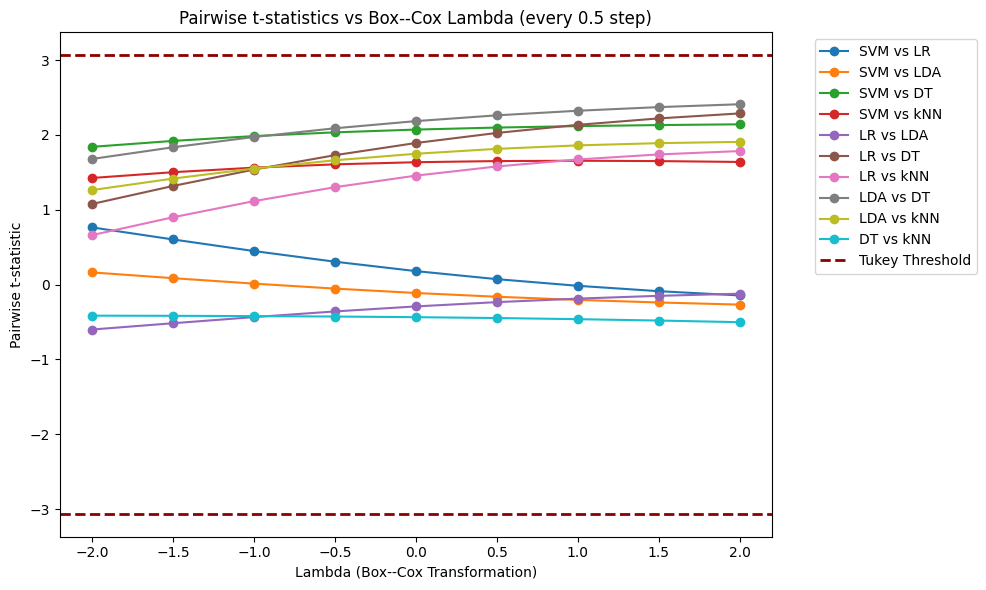

Optimal (MLE) Box--Cox lambda: 2.000


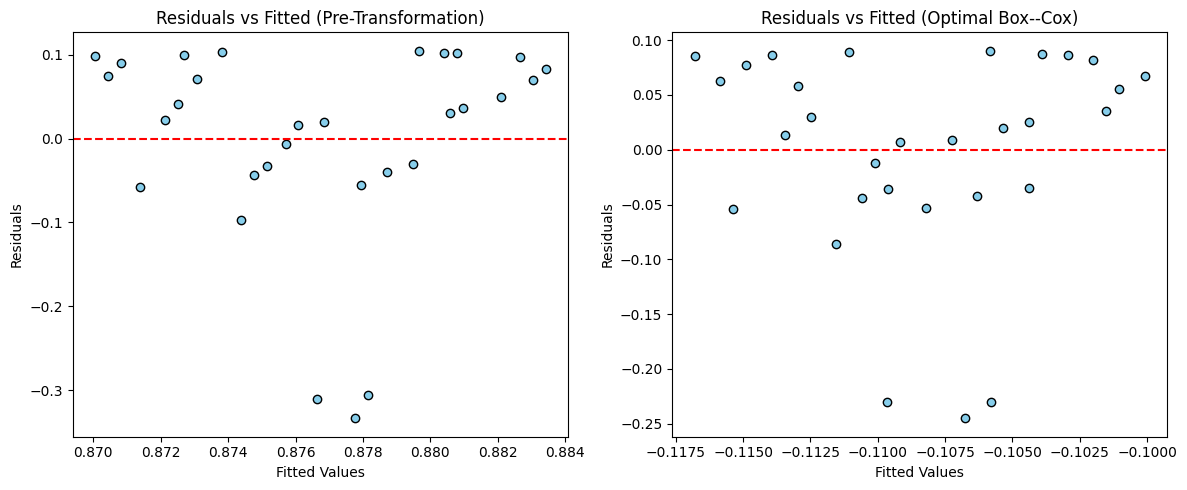

In [19]:
plot_pairwise_t_vs_lambda_with_residuals(response_matrix, treatment_names=['SVM', 'LR', 'LDA', 'DT', 'kNN'])

In [25]:
anova_tbl_1, pairwise_tbl_1 = bibd_anova_pairwise_boxcox(response_matrix, lam=2, treatment_names=['SVM', 'LR', 'LDA', 'DT', 'kNN'])
print("ANOVA Table:")
print(anova_tbl_1)
print("\nPairwise Comparisons:")
print(pairwise_tbl_1)

ANOVA Table:
                 Source  Degrees of Freedom  Sum of Squares  Mean Square  \
0                 Block                   9        0.255441     0.028382   
1  Treatment (adjusted)                   4        0.003084     0.000771   
2              Residual                  16        0.004843     0.000303   
3                 Total                  29        0.263367          NaN   

      F-test       p-value  
0  93.774899  3.951793e-12  
1   2.547251  7.981944e-02  
2        NaN           NaN  
3        NaN           NaN  

Pairwise Comparisons:
   Comparison  Tau_i - Tau_j  t_statistic Significant (α=0.05)
0   SVM vs LR      -0.001601    -0.145478                   No
1  SVM vs LDA      -0.002951    -0.268162                   No
2   SVM vs DT       0.023557     2.140968                   No
3  SVM vs kNN       0.018021     1.637859                   No
4   LR vs LDA      -0.001350    -0.122685                   No
5    LR vs DT       0.025158     2.286445                   

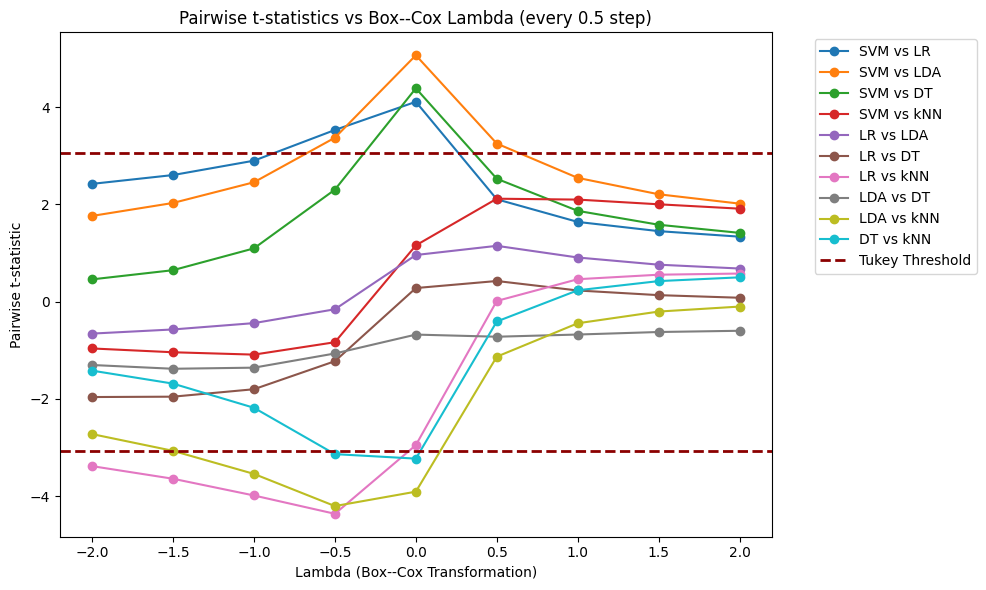

Optimal (MLE) Box--Cox lambda: -0.182


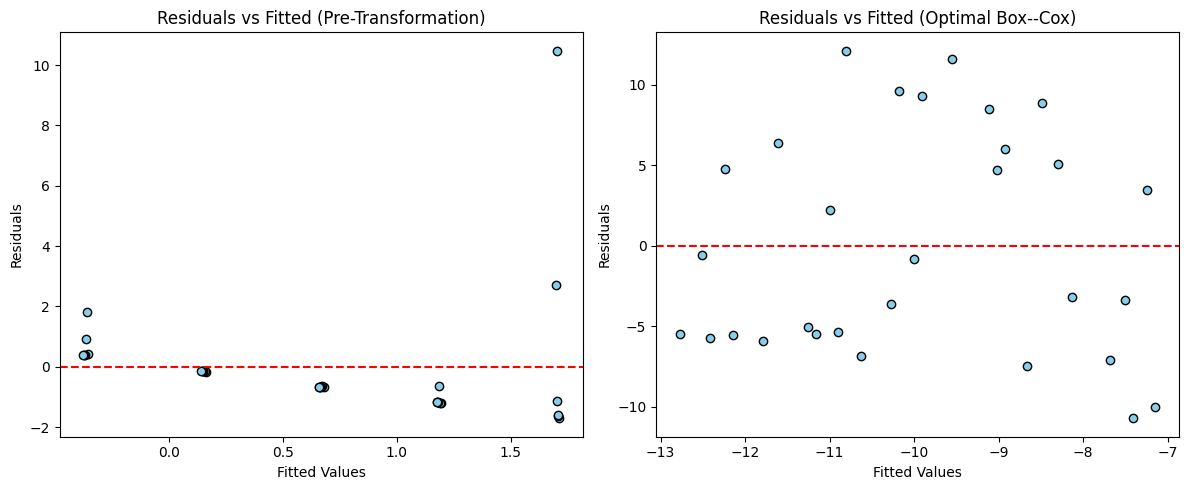

In [20]:
plot_pairwise_t_vs_lambda_with_residuals(prediction_matrix, treatment_names=['SVM', 'LR', 'LDA', 'DT', 'kNN'])

In [26]:
anova_tbl_2, pairwise_tbl_2 = bibd_anova_pairwise_boxcox(prediction_matrix, lam=-0.182, treatment_names=['SVM', 'LR', 'LDA', 'DT', 'kNN'])
print("ANOVA Table:")
print(anova_tbl_2)
print("\nPairwise Comparisons:")
print(pairwise_tbl_2)

ANOVA Table:
                 Source  Degrees of Freedom  Sum of Squares  Mean Square  \
0                 Block                   9      985.722546   109.524727   
1  Treatment (adjusted)                   4      363.753662    90.938415   
2              Residual                  16      133.621257     8.351329   
3                 Total                  29     1483.097465          NaN   

      F-test   p-value  
0  13.114647  0.000008  
1  10.889096  0.000186  
2        NaN       NaN  
3        NaN       NaN  

Pairwise Comparisons:
   Comparison  Tau_i - Tau_j  t_statistic Significant (α=0.05)
0   SVM vs LR       7.793097     4.263853                  Yes
1  SVM vs LDA       8.564767     4.686059                  Yes
2   SVM vs DT       7.155366     3.914930                  Yes
3  SVM vs kNN       0.212415     0.116219                   No
4   LR vs LDA       0.771671     0.422206                   No
5    LR vs DT      -0.637731    -0.348923                   No
6   LR vs kNN    

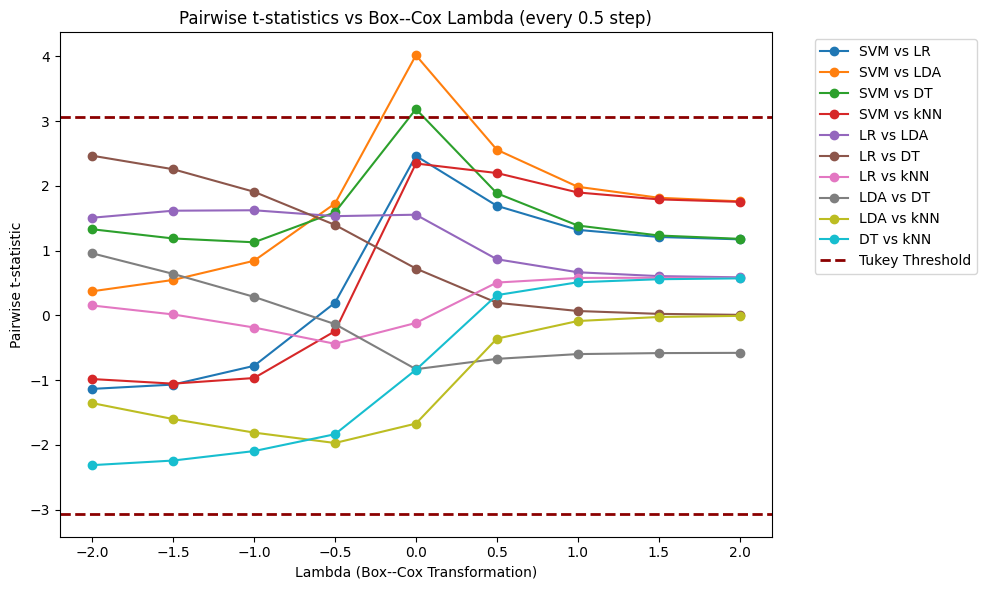

Optimal (MLE) Box--Cox lambda: -0.222


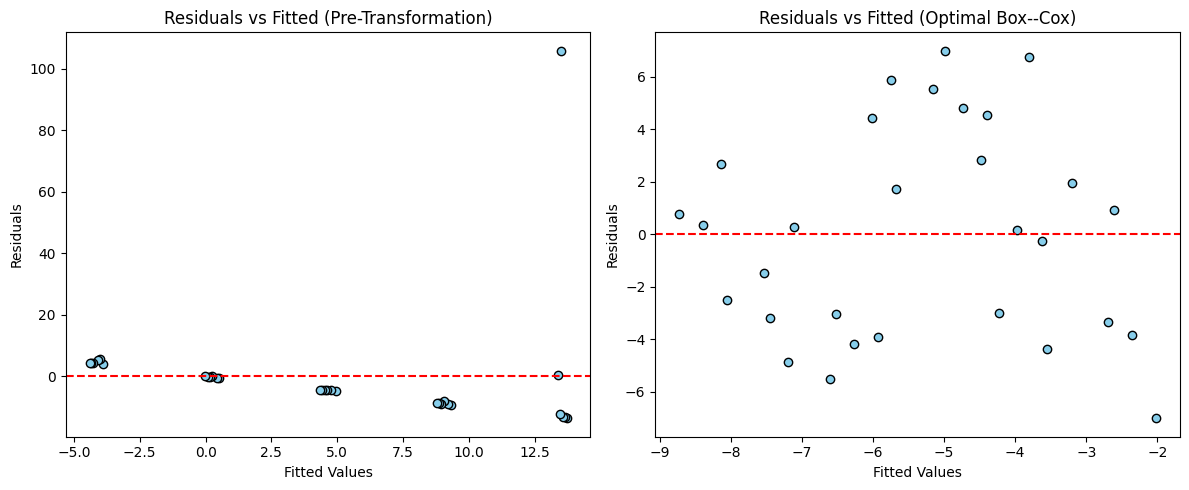

In [21]:
plot_pairwise_t_vs_lambda_with_residuals(traing_testing_martix, treatment_names=['SVM', 'LR', 'LDA', 'DT', 'kNN'])

In [27]:
anova_tbl_3, pairwise_tbl_3 = bibd_anova_pairwise_boxcox(traing_testing_martix, lam=-0.222, treatment_names=['SVM', 'LR', 'LDA', 'DT', 'kNN'])
print("ANOVA Table:")
print(anova_tbl_3)
print("\nPairwise Comparisons:")
print(pairwise_tbl_3)

ANOVA Table:
                 Source  Degrees of Freedom  Sum of Squares  Mean Square  \
0                 Block                   9      482.110827    53.567870   
1  Treatment (adjusted)                   4       39.335656     9.833914   
2              Residual                  16       51.915678     3.244730   
3                 Total                  29      573.362162          NaN   

      F-test   p-value  
0  16.509192  0.000002  
1   3.030734  0.048831  
2        NaN       NaN  
3        NaN       NaN  

Pairwise Comparisons:
   Comparison  Tau_i - Tau_j  t_statistic Significant (α=0.05)
0   SVM vs LR       1.695394     1.488166                   No
1  SVM vs LDA       3.523456     3.092784                  Yes
2   SVM vs DT       2.926818     2.569073                   No
3  SVM vs kNN       1.170578     1.027499                   No
4   LR vs LDA       1.828062     1.604618                   No
5    LR vs DT       1.231425     1.080908                   No
6   LR vs kNN    